In [1]:
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

In [4]:

img = cv2.imread('/workspaces/flora_dex/raw_data/Actaea rubra/9.jpg')
def horiztonal_flip_image(img, flag):
    if flag:
        return cv2.flip(img, 1)
    else:
        return img
img_flipped = horiztonal_flip_image(img, True)

In [5]:
def rotate_image(img, angle):
    angle = int(random.uniform(-angle, angle))
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img
img_rotated = rotate_image(img, 30)

In [6]:

def fill(img, h, w):
    img = cv2.resize(img, (h, w), cv2.INTER_CUBIC)
    return img
def zoom(img, value):
    if value > 1 or value < 0:
        print('Value for zoom should be less than 1 and greater than 0')
        return img
    value = random.uniform(value, 1)
    h, w = img.shape[:2]
    h_taken = int(value*h)
    w_taken = int(value*w)
    h_start = random.randint(0, h-h_taken)
    w_start = random.randint(0, w-w_taken)
    img = img[h_start:h_start+h_taken, w_start:w_start+w_taken, :]
    img = fill(img, h, w)
    return img
img_zoomed = zoom(img, 0.5)

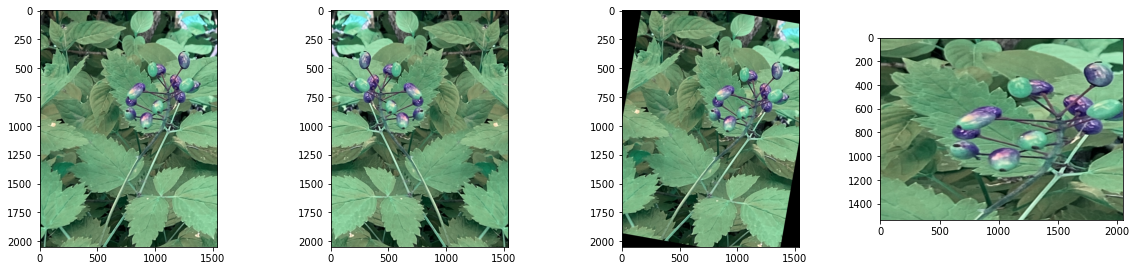

In [7]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(4,4,1)

plt.imshow(img)
ax = fig.add_subplot(4,4,2)

plt.imshow(img_flipped)
ax = fig.add_subplot(4,4,3)

plt.imshow(img_rotated)
ax = fig.add_subplot(4,4,4)
         
plt.imshow(img_zoomed)